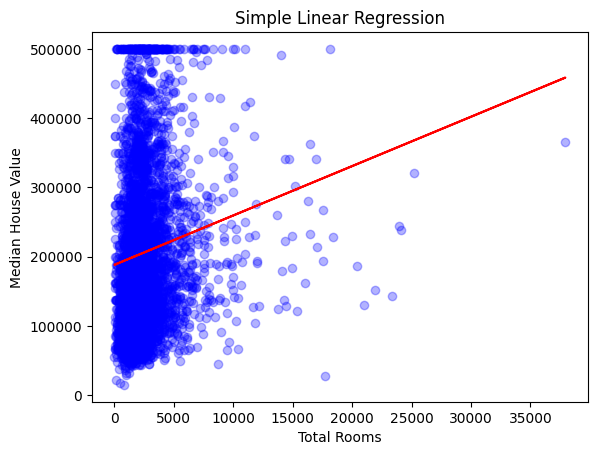

In [ ]:
'''
Task 1: Simple Linear Regression
● Use the scikit-learn library.
● Load the California Housing Dataset (or any house price dataset).
● Predict the house price using a single feature (e.g., number of rooms).
● Train a simple linear regression model.
● Plot the regression line using matplotlib.

'''


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('housing.csv')

X = df[['total_rooms']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

plt.scatter(X_test, y_test, color='blue', alpha=0.3)
plt.plot(X_test, model.predict(X_test), color='red')
plt.xlabel("Total Rooms")
plt.ylabel("Median House Value")
plt.title("Simple Linear Regression")
plt.show()


In [ ]:
'''
Task 2: Multiple Linear Regression
● Use the same dataset or load another dataset with at least 4 numeric
features.
● Predict the target variable using multiple independent variables.
● Evaluate the model using:
○ R-squared
○ Mean Squared Error (MSE)
○ Root Mean Squared Error (RMSE)
● Display the coefficients of each feature.

'''


from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


features = ['housing_median_age', 'total_rooms', 'population', 'median_income']
X = df[features]
y = df['median_house_value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print("R² Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("Coefficients:", dict(zip(features, model.coef_)))


R² Score: 0.5012822817393567
MSE: 6535241756.165624
RMSE: 80840.84212924568
Coefficients: {'housing_median_age': 1986.7521948882013, 'total_rooms': 9.546511530390921, 'population': -12.16101081265527, 'median_income': 41402.584727611335}


In [ ]:
'''
Task 3: Feature Scaling and Normalization
● Demonstrate the effect of standardizing features using
StandardScaler.
● Compare model performance before and after scaling.

'''

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)


y_pred_scaled = model_scaled.predict(X_test_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)


print("After Scaling:")
print("R² Score:", r2_scaled)
print("MSE:", mse_scaled)
print("RMSE:", rmse_scaled)


After Scaling:
R² Score: 0.5012822817393567
MSE: 6535241756.165624
RMSE: 80840.84212924568


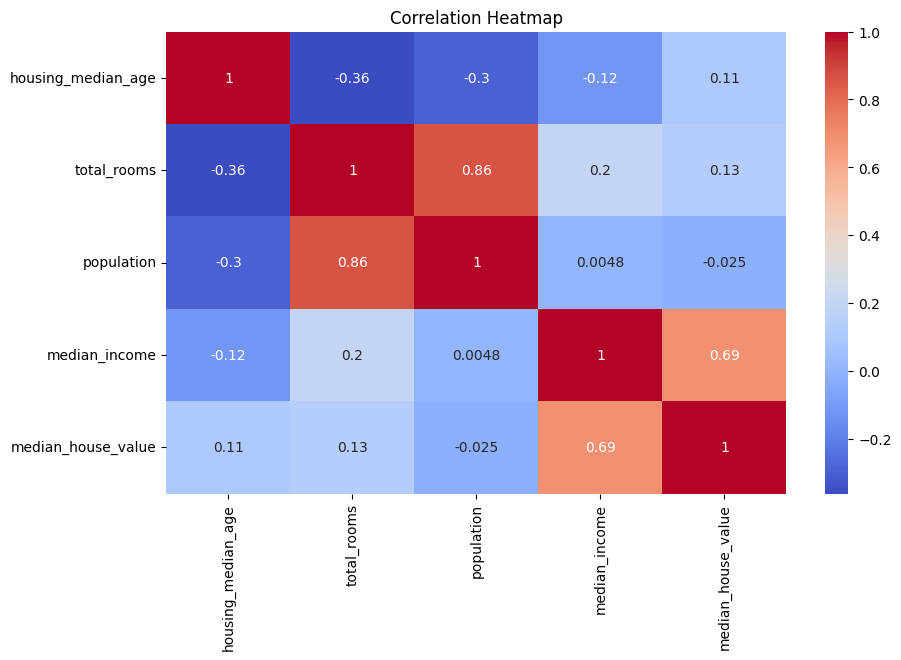


Features with strongest correlation to target:
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
population           -0.024650
Name: median_house_value, dtype: float64

Multicollinearity check (correlation between features):
                    housing_median_age  total_rooms  population  median_income
housing_median_age            1.000000    -0.361262   -0.296244      -0.119034
total_rooms                  -0.361262     1.000000    0.857126       0.198050
population                   -0.296244     0.857126    1.000000       0.004834
median_income                -0.119034     0.198050    0.004834       1.000000


In [ ]:
'''
Task 4: Model Interpretation
● Write Python code to:
○ Show the correlation matrix using a heatmap.
○ Identify which features have the strongest relationship with
the target.
○ Discuss multicollinearity and how it might affect regression.
'''

import seaborn as sns
plt.figure(figsize=(10, 6))
corr = df[features + ['median_house_value']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


cor_target = corr['median_house_value'].drop('median_house_value')
print("\nFeatures with strongest correlation to target:")
print(cor_target.sort_values(ascending=False))
print("\nMulticollinearity check (correlation between features):")
print(corr.loc[features, features])
